# Clustering dengan Algoritma K-Means
Clustering adalah teknik untuk mengelompokkan objek-objek yang serupa berdasarkan kesamaan karakteristiknya. Misalnya, mengelompokkan pakaian berdasarkan jenisnya. Ini membantu kita memahami pola dalam data dan membuat keputusan yang lebih baik.

Sedangkan K-Means adalah algoritma partisi, di mana setiap objek akan dikelompokkan ke dalam salah satu kelompok berdasarkan jarak Euclidean terdekat antara objek dengan pusat kelompok yang telah ditentukan sebelumnya.

# Dataset Global Data Usage
Data yang akan digunakan dalam clustering menggunakan metode K-Means ini adalah dataset penggunaan internet global (Global Internet Usage). Dataset ini berisi data-data pengukuran atau analisis yang melibatkan penggunaan internet di negara-negara di seluruh dunia. Global Internet Usage memberikan wawasan tentang seberapa banyak orang yang menggunakan internet, tingkat aksesibilitas internet, tingkat adopsi teknologi digital, dan pola penggunaan internet di berbagai wilayah dan negara di dunia.

# Tujuan Clustering
Adapun tujuan dilakukannya clustering pada dataset Global Data Usage meliputi:
- Mengelompokkan negara-negara berdasarkan pola kesamaan atau perbedaan dalam variabel yang digunakan yang mana akan membantu dalam menganalisis dan memahami variasi karakteristik di antara negara-negara di seluruh dunia.
- Mengidentifikasi kelompok-kelompok negara yang memiliki karakteristik serupa dalam hal penggunaan internet, yang memungkinkan kita untuk memahami dan membandingkan tren dan kecenderungan dalam penggunaan internet di seluruh dunia.

# Implementasi Pada Python

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Library yang digunakan untuk melakukan clustering dengan K-Means meliputi:
- ```numpy (np)```: Library untuk operasi numerik dan manipulasi array.
- ```pandas (pd)```: Library untuk manipulasi dan analisis data.
- ```matplotlib.pyplot (plt)```: Library untuk membuat visualisasi grafik dan plot.
- ```sklearn.cluster.KMeans```: Class dari library scikit-learn untuk menerapkan algoritma K-Means Clustering.
- ```sklearn.preprocessing.MinMaxScaler```: Class dari library scikit-learn untuk melakukan penskalaan data ke rentang yang ditentukan.

In [37]:
df = pd.read_csv('gapminder_internet.csv') # Membaca file csv

# Kondisi Awal Dataset
Kondisi awal dataset Global Internet Usage yaitu terdapat beberapa variabel, antara lain:
- country(string)
- incomeperson(number)
- internetuserate(number)
- urbanrate(number)

Namun dapat dilihat pada kolom incomeperson(number) terdapat nilai NaN. Yang artinya data dalam dataset ini masih berantakan.

In [38]:
df # Menampilkan dataframe

,country,incomeperperson,internetuserate,urbanrate
0,Afghanistan,NaN,3.654122,24.04
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
...,...,...,...,...
208,Vietnam,722.807559,27.851822,27.84
209,West Bank and Gaza,NaN,36.422772,71.90
210,"Yemen, Rep.",610.357367,12.349750,30.64
211,Zambia,432.226337,10.124986,35.42


Maka dari itu, perlu dilakukan beberapa tahap pengolahan data sebelum melakukan clustering

# Cleaning Data
Cleaning data (pembersihan data) adalah proses yang melibatkan identifikasi, penanganan, dan koreksi masalah-masalah yang terdapat dalam dataset yang tidak lengkap, tidak akurat, tidak konsisten, atau tidak relevan. Tujuan dari cleaning data adalah memastikan bahwa dataset yang digunakan untuk analisis atau pemodelan data bebas dari kesalahan atau kekurangan yang dapat mengganggu validitas, keandalan, dan hasil yang akurat.

Pada kasus ini, kita akan menghapus missing values / menghilangkan baris-baris yang memiliki nilai yang tidak tersedia (NaN) dari dataset agar data tetap konsisten.

In [39]:
# Mengubah kolom 'incomeperperson', 'internetuserate', dan 'urbanrate' menjadi tipe data numerik
df['incomeperperson'] = pd.to_numeric(df['incomeperperson'], errors='coerce')
df['internetuserate'] = pd.to_numeric(df['internetuserate'], errors='coerce')
df['urbanrate'] = pd.to_numeric(df['urbanrate'], errors='coerce')

# Menghapus baris yang memiliki data yang bukan angka pada kolom "incomeperperson", "internetuserate", dan "urbanrate"
df = df.loc[~df['incomeperperson'].isna() & ~df['internetuserate'].isna() & ~df['urbanrate'].isna()]

In [40]:
df # Menampilkan hasil cleaning data

,country,incomeperperson,internetuserate,urbanrate
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
5,Antigua and Barbuda,11894.464070,80.645455,30.46
...,...,...,...,...
207,Venezuela,5528.363114,35.850437,93.32
208,Vietnam,722.807559,27.851822,27.84
210,"Yemen, Rep.",610.357367,12.349750,30.64
211,Zambia,432.226337,10.124986,35.42


# Scaling Data
Scaling data adalah proses mengubah rentang atau skala variabel-variabel dalam dataset sehingga semua variabel memiliki kontribusi yang seimbang dalam pembentukan cluster. Tujuan utama dari scaling data adalah untuk memastikan bahwa perbedaan skala atau rentang nilai antar variabel tidak mempengaruhi hasil clustering secara tidak proporsional.

Jika scaling data tidak dilakukan, hasil clustering dapat dipengaruhi secara signifikan oleh variabel dengan rentang nilai yang besar, sementara variabel dengan rentang nilai yang lebih kecil dapat memiliki pengaruh yang terabaikan.

In [41]:
# Menggunakan subset DataFrame 'numeric_data' yang hanya berisi kolom-kolom numerik yang akan diolah.
numeric_columns = ['incomeperperson', 'internetuserate', 'urbanrate']
numeric_data = df[numeric_columns]

# Scaling dan standarisasi data menggunakan MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_data) # Menghitung dan menerapkan transformasi skala pada data numerik.

# Mengganti nilai kolom-kolom numerik dalam DataFrame dengan data yang sudah diubah skala.
df.loc[:, numeric_columns] = scaled_data

<ipython-input-41-97bb22992ed1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, numeric_columns] = scaled_data


In [42]:
df # Menampilkan hasil scaling

,country,incomeperperson,internetuserate,urbanrate
1,Albania,0.022212,0.469253,0.405357
2,Algeria,0.026099,0.128788,0.611830
3,Andorra,0.267828,0.846606,0.876339
4,Angola,0.015663,0.102589,0.516741
5,Antigua and Barbuda,0.144594,0.842890,0.223884
...,...,...,...,...
207,Venezuela,0.066524,0.373479,0.925446
208,Vietnam,0.007591,0.289661,0.194643
210,"Yemen, Rep.",0.006212,0.127213,0.225893
211,Zambia,0.004028,0.103899,0.279241


Dalam proses scaling ini, nilai-nilai asli pada setiap kolom telah diubah menjadi nilai yang berada dalam rentang antara 0 dan 1. Dengan skala ini, nilai-nilai pada kolom-kolom tersebut menjadi seragam dan dapat dibandingkan secara relatif.

# Menentukan Nilai K Menggunakan Elbow Method
Elbow method adalah metode yang digunakan untuk menentukan jumlah optimal dari kluster (k) dalam algoritma clustering, seperti K-means. Tujuan utama dari elbow method adalah untuk mencari titik di grafik yang menunjukkan perubahan yang signifikan dalam penjelasan varians (variance explained) dengan penambahan jumlah kluster.

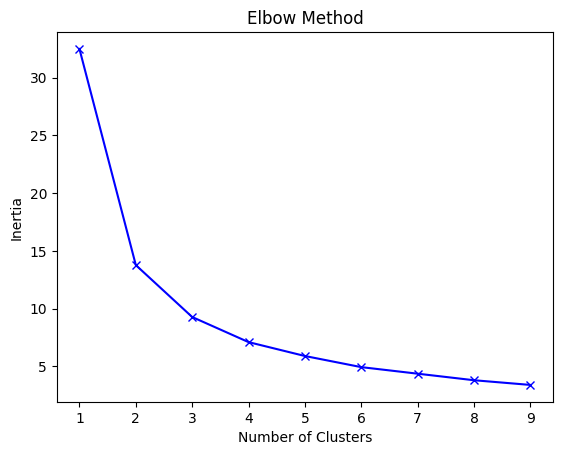

In [43]:
# Membuat range k_values dari 1 hingga 9 yang akan digunakan sebagai jumlah kluster pada algoritma K-means.
k_values = range(1, 10)

# Mengiterasi melalui setiap jumlah kluster dan menghitung inersia (within-cluster sum of squares) untuk setiap iterasi:
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    # kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['incomeperperson', 'internetuserate', 'urbanrate']])
    inertia.append(kmeans.inertia_)

# Menampilkan grafik elbow method yang menunjukkan hubungan antara jumlah kluster (x-axis) dan inertia (y-axis).
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Note mengenai elbow method:
- Inertia mengacu pada jumlah total squared distances antara setiap titik data dan pusat kluster terdekat. Semakin rendah nilai inertia, semakin
baik klasterisasi.
- Pada grafik elbow, kita mencari titik di mana penurunan inertia mulai menurun secara signifikan (menyebabkan penekukan seperti siku).

Oleh karena itu kita akan mencoba melakukan clustering menggunakan nilai k = 2 dan k = 3.

# Implementasi Algoritma K-Means Dengan K = 2

In [44]:
# Inisialisasi objek KMeans dengan jumlah kluster yang diinginkan
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)

# Melakukan proses clustering dengan menggunakan fitur incomeperperson, internetuserate, dan urbanrate dari dataframe df
kmeans.fit(df[['incomeperperson', 'internetuserate', 'urbanrate']])

# Menambahkan kolom 'cluster' pada dataframe df dan mengisinya dengan label kluster yang ditemukan oleh KMeans
df.loc[:, 'cluster'] = kmeans.labels_

<ipython-input-44-fe9af3a56fd3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'cluster'] = kmeans.labels_


In [45]:
df # Menampilkan cluster

,country,incomeperperson,internetuserate,urbanrate,cluster
1,Albania,0.022212,0.469253,0.405357,1
2,Algeria,0.026099,0.128788,0.611830,1
3,Andorra,0.267828,0.846606,0.876339,0
4,Angola,0.015663,0.102589,0.516741,1
5,Antigua and Barbuda,0.144594,0.842890,0.223884,0
...,...,...,...,...,...
207,Venezuela,0.066524,0.373479,0.925446,0
208,Vietnam,0.007591,0.289661,0.194643,1
210,"Yemen, Rep.",0.006212,0.127213,0.225893,1
211,Zambia,0.004028,0.103899,0.279241,1


Kolom baru dengan nama ```cluster``` merupakan hasil clustering yang telah dilakukan. Dataset dibagi menjadi sebanyak nilai yang ditentukan (2). Terdapat 2 yang terbentuk yaitu cluster 0 dan cluster 1.

### Visualisasi Dengan Scatter Plot

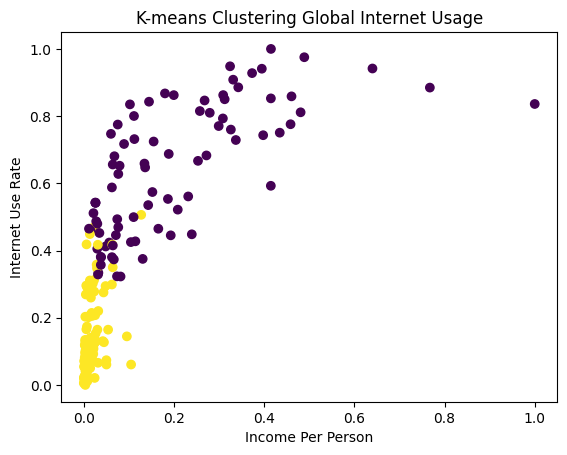

In [46]:
# Visualisasi scatter plot
plt.scatter(df['incomeperperson'], df['internetuserate'], c=df['cluster'], cmap='viridis')

plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title('K-means Clustering Global Internet Usage')
plt.show()

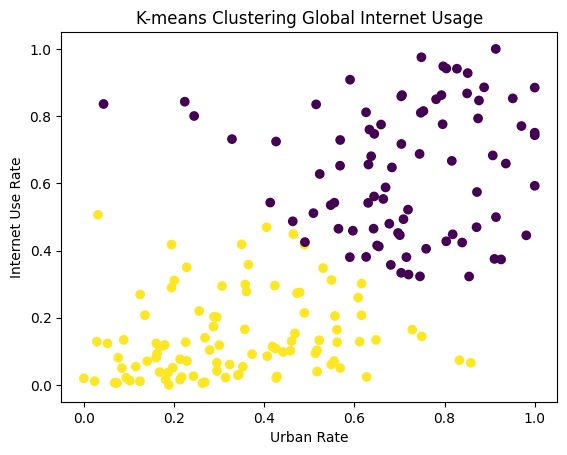

In [47]:
# Visualisasi scatter plot
plt.scatter(df['urbanrate'], df['internetuserate'], c=df['cluster'], cmap='viridis')

plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('K-means Clustering Global Internet Usage')
plt.show()

Note:
- Cluster 0 = ungu
- Cluster 1 = kuning

Informasi yang dapat diambil dari hasil clustering menggunakan K-Means tersebut antara lain:

1. ```cluster 0``` memiliki rata-rata tingkat pendapatan per individu (incomeperperson) yang relatif lebih tinggi dibandingkan ```cluster 1```. Kelompok pertama juga memiliki tingkat penggunaan internet (internetuserate) dan tingkat urbanisasi (urbanrate) yang lebih tinggi dibandingkan kelompok kedua.

2. ```cluster 1``` memiliki rata-rata tingkat pendapatan per individu (incomeperperson) yang relatif lebih rendah dibandingkan ```cluster 0```. Kelompok kedua juga memiliki tingkat penggunaan internet (internetuserate) dan tingkat urbanisasi (urbanrate) yang lebih rendah dibandingkan ```cluster 0```.

3. Negara-negara yang termasuk dalam ```cluster 0``` memiliki karakteristik yang lebih maju dalam hal pendapatan per individu, penggunaan internet, dan tingkat urbanisasi. Sementara itu, negara-negara yang termasuk dalam ```cluster 1``` memiliki karakteristik yang lebih rendah dalam hal hal tersebut.

# Kesimpulan
Dengan hasil clustering yang telah dilakukan, data global penggunaan internet dapat dikelompokkan berdasarkan pola dan karakteristiknya. Kelompok-kelompok tersebut dapat digunakan untuk beberapa tujuan, antara lain:
- Analisis perbandingan negara dalam bidang teknologi terutama internet.
- Perencanaan kebijakan dan strategi

Misalnya, dengan mengetahui kelompok negara yang memiliki tingkat penggunaan internet yang tinggi, perusahaan teknologi atau penyedia layanan internet dapat mengarahkan upaya pemasaran dan pengembangan produk mereka ke negara-negara tersebut.